In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe_root = '../'
DATA_PATH = '../data/flickr_style/images'
RES_PATH = '/home/hawk/Dropbox/linux/vision_project/img_new/'

MODEL_FILE_PLACE = '../models/Places_CNDS_models/deploy.prototxt'
PRETRAINED_PLACE = '../models/Places_CNDS_models/finetune_flickr_style_withplace_iter_35000.caffemodel'
MODEL_FILE_STYLE = '../models/finetune_flickr_style/deploy.prototxt'
PRETRAINED_STYLE = '../models/finetune_flickr_style/finetune_flickr_style.caffemodel'
MODEL_FILE_VGG = '../models/vgg16/VGG_ILSVRC_16_layers_deploy.prototxt'
PRETRAINED_VGG = '../models/vgg16/vgg16_flickr_iter_4000.caffemodel'

style_dic = np.loadtxt(caffe_root + 'examples/finetune_flickr_style/style_names.txt', str, delimiter='\t')
synset_dic = np.loadtxt(caffe_root + 'data/ilsvrc12/synset_words.txt', str, delimiter='\t')
flickr_test_set = np.loadtxt(caffe_root + 'data/flickr_style/test.txt' , str, delimiter='\t')
flickr_test_set_path = [readline.split()[0] for readline in flickr_test_set]
flickr_test_set_label = [int(readline.split()[1]) for readline in flickr_test_set]
flickr_train_set = np.loadtxt(caffe_root + 'data/flickr_style/train.txt' , str, delimiter='\t')
flickr_train_set_path = [readline.split()[0] for readline in flickr_test_set]
flickr_train_set_label = [int(readline.split()[1]) for readline in flickr_test_set]

In [14]:
prefix = 'style'

# net = caffe.Classifier(MODEL_FILE_PLACE, PRETRAINED_PLACE,
#                        mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
#                        channel_swap=(2,1,0),
#                        raw_scale=255,
#                        image_dims=(227, 227))

net = caffe.Classifier(MODEL_FILE_STYLE, PRETRAINED_STYLE,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(227, 227))

"""
# Cannot Visualize VGG16 in Our Enviroment
net = caffe.Classifier(MODEL_FILE_VGG, PRETRAINED_VGG,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(227, 227))
"""

"\n# Cannot Visualize VGG16 in Our Enviroment\nnet = caffe.Classifier(MODEL_FILE_VGG, PRETRAINED_VGG,\n                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),\n                       channel_swap=(2,1,0),\n                       raw_scale=255,\n                       image_dims=(227, 227))\n"

Top0: Macro - 0.262641847134
Top1: Serene - 0.174629569054
Top2: Depth of Field - 0.164299726486
Top3: Bokeh - 0.124882481992
Top4: Vintage - 0.0849132239819


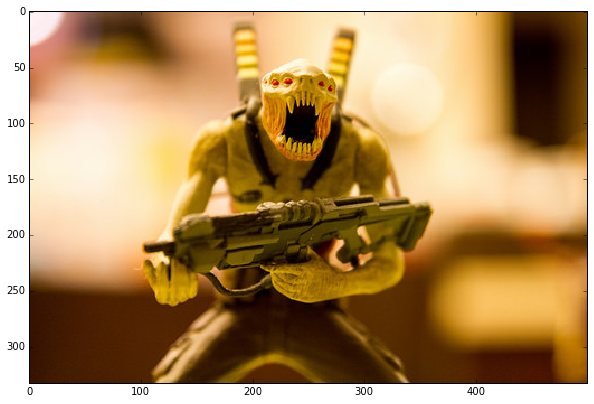

In [15]:
img = caffe.io.load_image(flickr_test_set_path[72])
plt.imshow(img)
predict_style = net.predict([img], oversample=True)

for i, label in enumerate(predict_style[0].argsort()[-1:-6:-1]):
    print "Top{0}: {1} - {2}".format(i, style_dic[label], predict_style[0][label])

In [6]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

In [55]:
net.params.keys()

['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8_flickr']

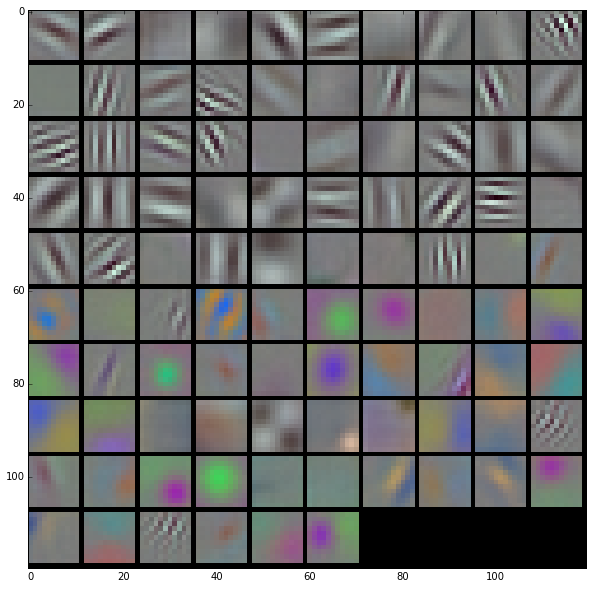

In [16]:
net_param = 'conv1'
filters = net.params[net_param][0].data
vis_square(filters.transpose(0, 2, 3, 1))
plt.savefig(RES_PATH + '{}_{}filter.png'.format(prefix, net_param))

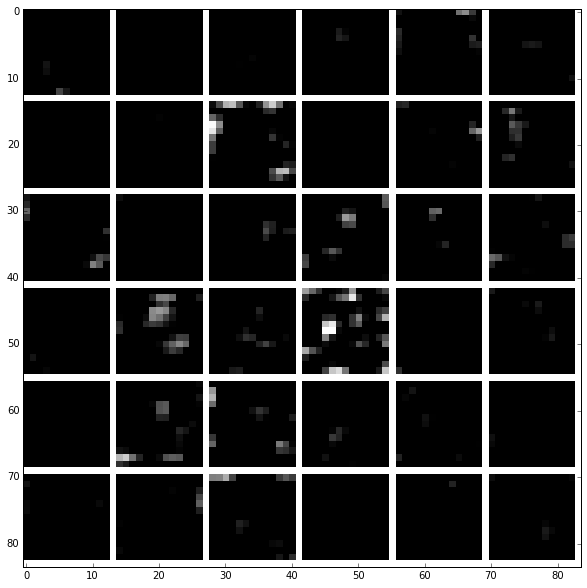

In [17]:
net_param = 'conv5'
feat = net.blobs[net_param].data[0, :36]
vis_square(feat, padval=1)
plt.savefig(RES_PATH + '{}_{}'.format(prefix, net_param))

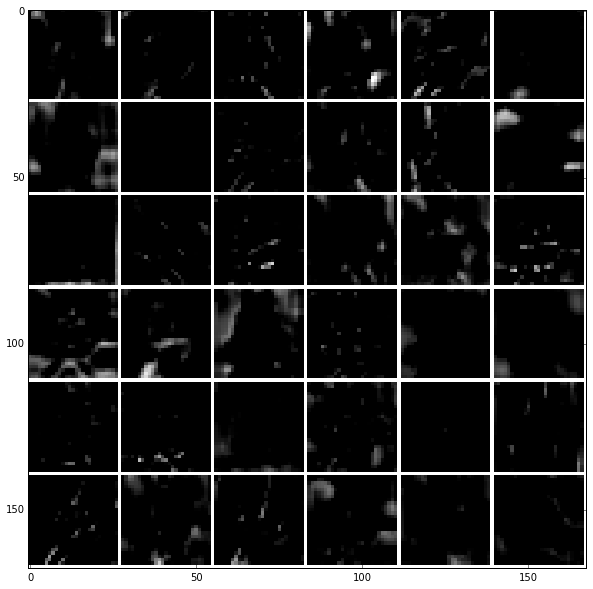

In [18]:
net_param = 'conv2'
feat = net.blobs[net_param].data[0, :36]
vis_square(feat, padval=1)
plt.savefig(RES_PATH + '{}_{}'.format(prefix, net_param))

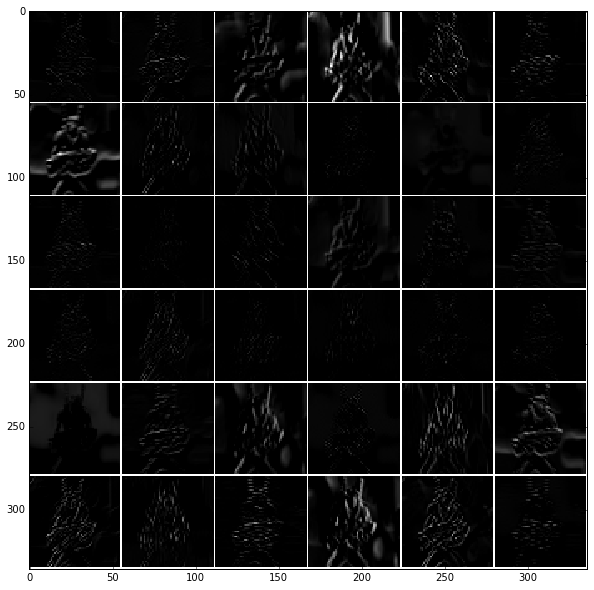

In [19]:
net_param = 'conv1'
feat = net.blobs[net_param].data[0, :36]
vis_square(feat, padval=1)
plt.savefig(RES_PATH + '{}_{}'.format(prefix, net_param))